In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

sns.set_context("talk")
sns.set_style("white")

%matplotlib inline

## Load the Data

In [14]:
output_dir = "./output/"
df = pd.read_csv("./data/1-cat.csv")
df.head()

,year,count,count_domain,category
0,2021,3070,194520,Materials Science
1,2020,2265,202724,Materials Science
2,2019,1246,193508,Materials Science
3,2018,471,166327,Materials Science
4,2017,238,153283,Materials Science


# Calculate relevant stats on the dataframe

In [15]:
def growth(x):
    return  (x[-1]-x[0]) / x[0]
    
def cagr(x):
    return  (x[-1] / x[0]) ** (1 / (len(x) - 1)) - 1

        
def calculate_stats(group):
    group['yoy_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(growth, raw=True)
    group['yoy_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(growth, raw=True)
    group['yoy_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(growth, raw=True)
    group['cagr_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(cagr, raw=True)*100
    group['cagr_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(cagr, raw=True)*100
    group['cagr_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(cagr, raw=True)*100
    return group

df['normalized'] = 100*df['count']/df['count_domain']
df = df.groupby('category').apply(calculate_stats)

# Show Latest Stats

cagr - Compound Annual Growth Rate (%)

yoy_n - current count / count n years ago

In [16]:
df[df.year==2021]

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2021,3070,194520,Materials Science,1.578244,0.355408,1.463884,24.798319,35.540839,56.967654,91.565935
22,2021,5044,263298,Chemistry,1.915700,0.165704,0.687521,3.523767,16.570372,29.904615,35.238406
44,2021,3807,164709,Physics,2.311349,0.226482,1.300302,16.383562,22.648196,51.667469,77.022208


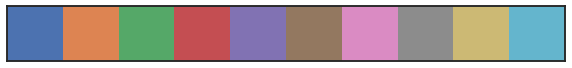

In [17]:
# Set plot time range
years = (2000, 2020)

# Set some marker defaults
marker_size = 150
marker_alpha = 0.6

# Set figure save parameters
fig_dpi = 1000

# Define plot sizes
golden = (4*1.618,4)

# Define palette options
colors = ["blue","orange","green"]*3
sns.set_palette("deep")
sns.palplot(sns.color_palette())

In [18]:
colors

['blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green']

# Visualize with MatplotLib

## All Together

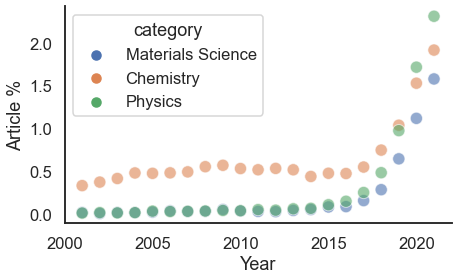

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)

category_list = ["Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="normalized",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter-norm.png'),
            dpi=fig_dpi)

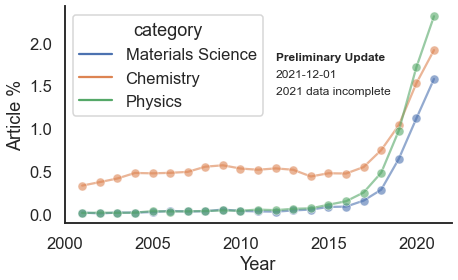

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
add_events = False

category_list = ["Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]

sns.lineplot(x="year", 
             y="normalized",
             hue="category", 
             data=data,
             marker="o",
             alpha=marker_alpha,
             ax=ax)

# sns.scatterplot(x="year", y="normalized",
#                 hue="category", data=data, 
#                 s=marker_size, alpha=marker_alpha,
#                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

plt.text(2012, 1.8, 'Preliminary Update', fontsize=12, fontweight="bold")
plt.text(2012, 1.6, '2021-12-01', fontsize=12)
plt.text(2012, 1.4, '2021 data incomplete', fontsize=12)




if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper', fontsize=12)
    plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
#     plt.text(2012.5, 0.9, 'MDF Funded')



# fig.savefig(os.path.join(output_dir,'1-all-line-norm.png'),
#              dpi=fig_dpi)

In [19]:
df[df.category=='Physics']

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
42,2020,2678,165951,Physics,1.613729,0.796110,2.604307,16.618421,79.610999,89.850122,77.497973
43,2019,1491,158003,Physics,0.943653,1.006729,2.976000,15.032258,100.672948,99.399097,74.180262
44,2018,743,171150,Physics,0.434122,0.981333,2.439815,7.951807,98.133333,85.467378,55.018005
45,2017,375,177894,Physics,0.210800,0.736111,1.467105,5.465517,73.611111,57.070216,45.251510
46,2016,216,174146,Physics,0.124034,0.421053,1.322581,2.085714,42.105263,52.400152,25.276942
47,2015,152,170701,Physics,0.089045,0.634409,0.831325,2.166667,63.440860,35.326468,25.927468
48,2014,93,169827,Physics,0.054762,0.120482,0.603448,0.823529,12.048193,26.627338,12.767137
49,2013,83,169136,Physics,0.049073,0.431034,0.185714,0.976190,43.103448,8.890509,14.595024
50,2012,58,164420,Physics,0.035276,-0.171429,0.208333,0.526316,-17.142857,9.924216,8.825051
51,2011,70,157951,Physics,0.044318,0.458333,0.372549,1.121212,45.833333,17.155837,16.229621


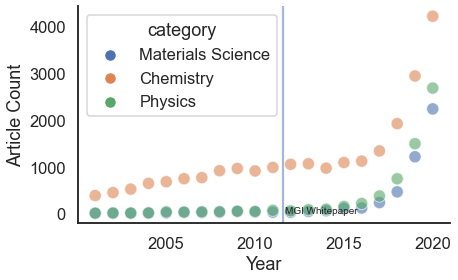

In [10]:
add_events = True
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="count",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper')
#     plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
#     plt.axvline(x=2015.83, alpha=0.5) # June 24, 2011, Holdren OSP memo 
#     plt.text(2012.5, 0.9, 'MDF Funded')

fig.savefig(os.path.join(output_dir,'fig-name.png'),dpi=fig_dpi)

fig.savefig(os.path.join(output_dir,'1-all-scatter.png'),
            dpi=fig_dpi)

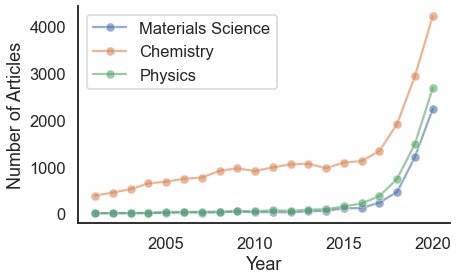

In [16]:
add_events = False

fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", 
             y="count",
             hue="category", 
             data=data,
             marker='o',
             alpha=marker_alpha,
             ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
sns.despine()
plt.tight_layout() 
plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])


if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper')
    plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
    plt.axvline(x=2015.83, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2012.5, 0.9, 'MDF Funded')

fig.savefig(os.path.join(output_dir,'fig-name.png'),dpi=fig_dpi)

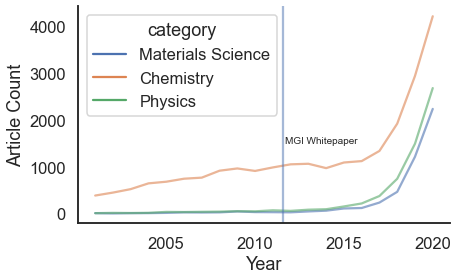

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", y="count",
                  hue="category", data=data,
                  alpha=marker_alpha,
                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
plt.text(2011.7, 1500, 'MGI Whitepaper')

fig.savefig(os.path.join(output_dir,'1-all-line.png'),dpi=fig_dpi)

## Grid

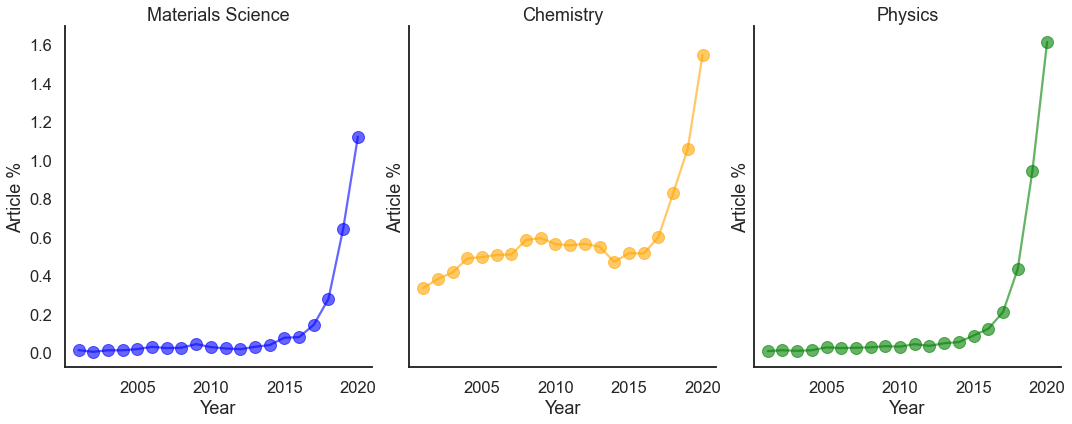

In [18]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['normalized'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article %")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line-norm.png'),dpi=fig_dpi)

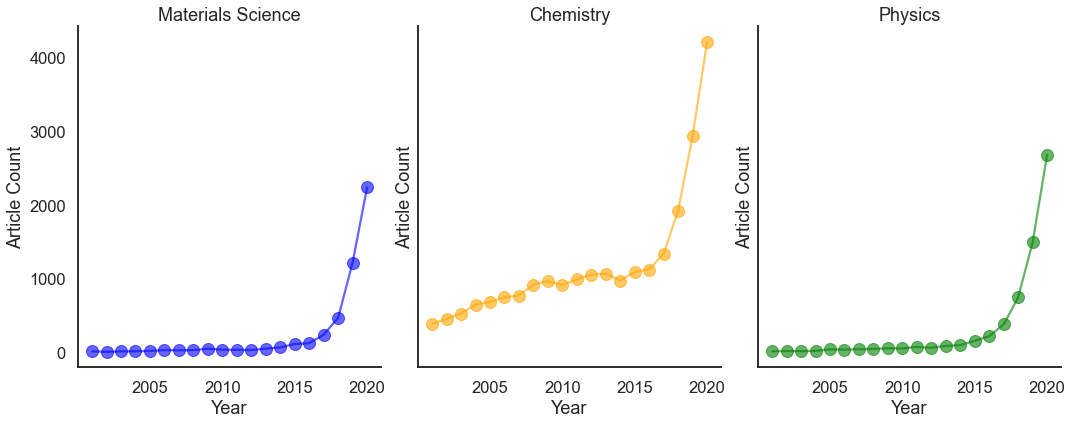

In [19]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['count'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article Count")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line.png'),dpi=fig_dpi)

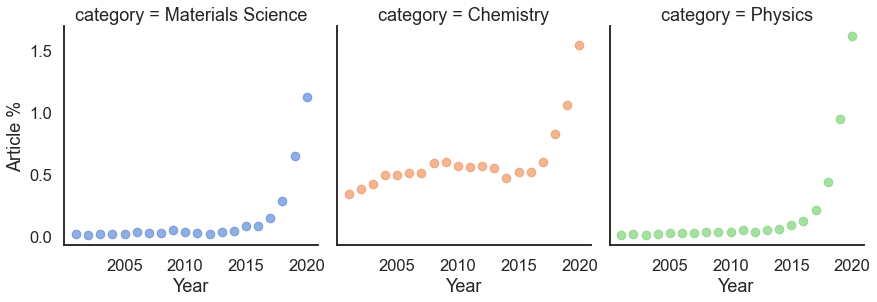

In [20]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="normalized", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article %")
sns_fig.savefig(os.path.join(output_dir,"1-grid-norm.png"), dpi=fig_dpi)

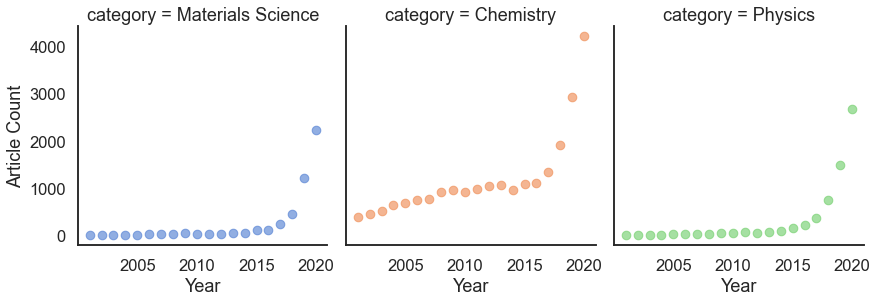

In [21]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article Count")
sns_fig.savefig(os.path.join(output_dir,"1-grid.png"), dpi=fig_dpi)

# Individual

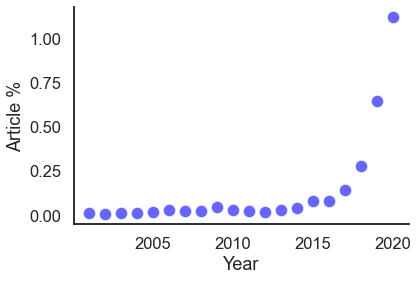

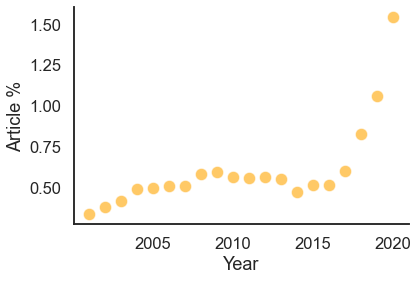

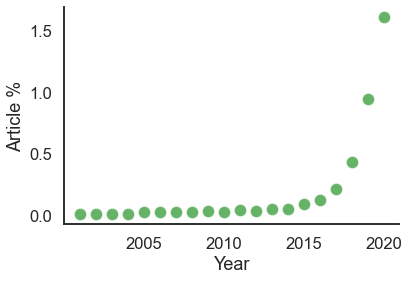

In [22]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="normalized",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article %")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}-norm.png'.format(category)),dpi=fig_dpi)

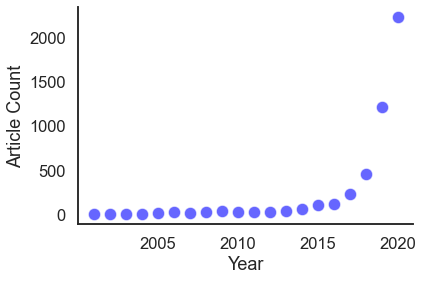

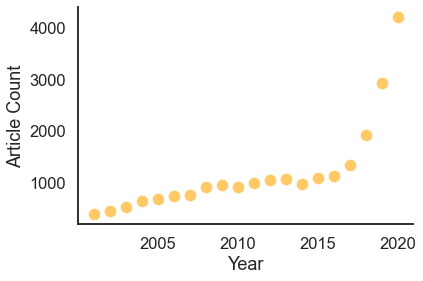

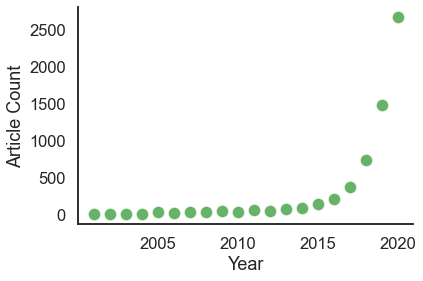

In [23]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article Count")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}.png'.format(category)),dpi=fig_dpi)

# Visualize with Altair

## All Together

In [ ]:
!pip install altair

In [24]:
data = df[df['category']=='Chemistry']

charts = []

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

NameError: name 'alt' is not defined

## All Together

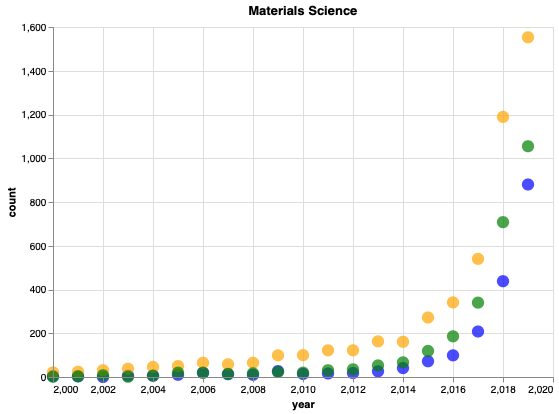

In [15]:
charts[0] + charts[1] + charts[2]

## Grid

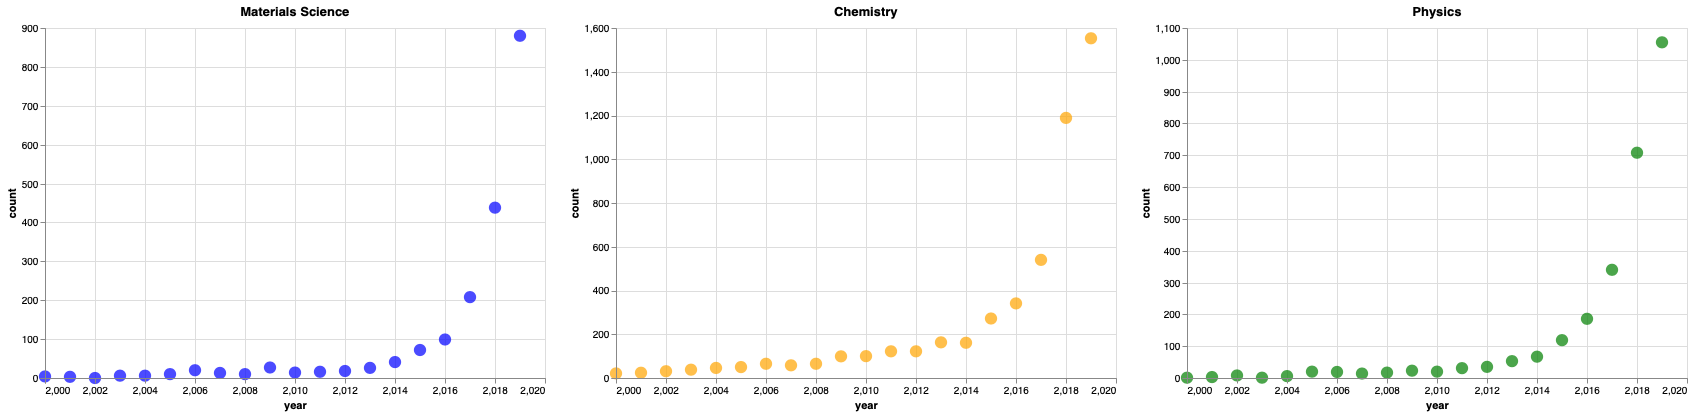

In [16]:
charts[0] | charts[1] | charts[2]

## Individual

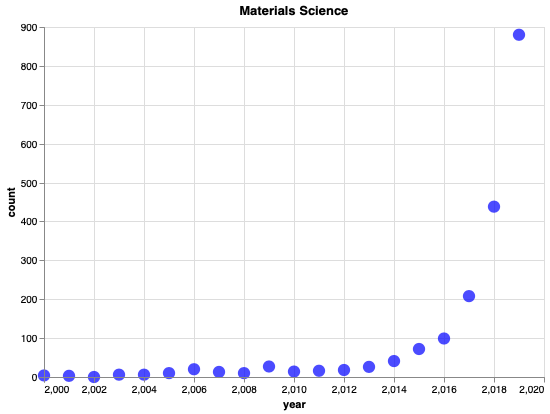

In [17]:
charts[0]

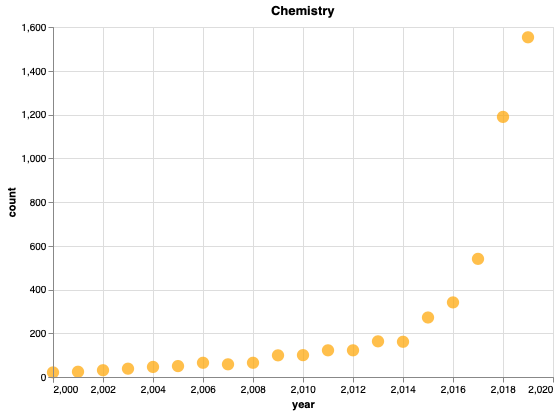

In [18]:
charts[1]

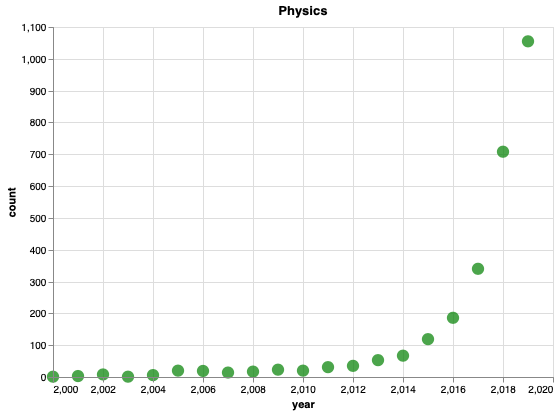

In [19]:
charts[2]